In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re as re
import seaborn as sns
import scipy.io as spio

sns.set(style='ticks')

In [75]:
# load the data from .mat files
mat1 = spio.loadmat('h4b1.mat', squeeze_me=True)
mat2 = spio.loadmat('h4b2.mat', squeeze_me=True)
mat3 = spio.loadmat('h4b3.mat', squeeze_me=True)

In [76]:
cd /Users/apple/Desktop/ML/HW4b

/Users/apple/Desktop/ML/HW4b


In [6]:
import scipy.io as spio

In [77]:
FL1 = mat1['FL'];
FLCost1 = mat1['FLCost'];

FL2 = mat2['FL'];
FLCost2 = mat2['FLCost'];

FL3 = mat3['FL'];
FLCost3 = mat3['FLCost'];

In [30]:
mat1

{'FL': array([[[[ 0.        ,  0.26093724,  0.73906276,  0.        ],
          [ 0.        ,  0.68905387,  0.31094613,  0.        ],
          [ 0.        ,  0.65488366,  0.34511634,  0.        ],
          [ 0.        ,  0.1160852 ,  0.8839148 ,  0.        ]],
 
         [[ 0.        ,  0.13889881,  0.18007011,  0.68103107],
          [ 0.        ,  0.34773172,  0.54839527,  0.10387301],
          [ 0.        ,  0.31185654,  0.38620585,  0.30193761],
          [ 0.        ,  0.29391353,  0.52960818,  0.17647829]],
 
         [[ 0.        ,  0.50623375,  0.16055425,  0.333212  ],
          [ 0.        ,  0.09782208,  0.65366892,  0.248509  ],
          [ 0.        ,  0.29044528,  0.47100027,  0.23855445],
          [ 0.        ,  0.38711913,  0.28657033,  0.32631053]],
 
         ..., 
         [[ 0.        ,  0.28888534,  0.10085086,  0.6102638 ],
          [ 0.        ,  0.34501401,  0.32449358,  0.33049241],
          [ 0.        ,  0.56118093,  0.05458566,  0.38423341],
          

In [9]:
mat1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'FL', 'FLCost'])

In [78]:
def chooseAction(Q,S,epsilon):
    var = np.random.random()
    if var < epsilon:
        a = np.random.randint(0,3)
    else:
        a = np.argmax(Q[S[0],S[1],:])
    return a

In [79]:
def newstate(FL,S,a):
    a1 = np.argmax(np.random.multinomial(1,FL[S[0],S[1],a,:]))
    if a1 == 0:
        S_new=[S[0]-1,S[1]]
        return S_new
    if a1 == 1:
        S_new=[S[0],S[1]+1]
        return S_new
    if a1 == 2:
        S_new=[S[0]+1,S[1]]
        return S_new
    if a1 == 3:
        S_new=[S[0],S[1]-1]
        return S_new

In [80]:
def policy(Q,FL):
    pol = np.zeros((Q.shape[0],Q.shape[1]))
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            pol[i,j] = np.argmax(Q[i,j,:])
    return pol

In [81]:
def MaxQ(Q):
    Qmax = np.zeros((Q.shape[0],Q.shape[1]))
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            Qmax[i,j] = max(Q[i,j,:])
    return Qmax

In [12]:
#Implement Q-table
Q = np.zeros([10, 10])
Q

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [82]:
# Homework 4b1
Q1 = np.random.randn(FL1.shape[0],FL1.shape[1],FL1.shape[2])*0.01
alpha = 0.05
gamma = 1.0
epsilon = 0.1
R1_array = []
for i in range(0,10000):
    S_init1 = [0,0]
    R_tot1 = 0.0
    while S_init1 != [FL1.shape[0]-1,FL1.shape[1]-1]:
        a = chooseAction(Q1,S_init1,epsilon)
        q = Q1[S_init1[0], S_init1[1],a]
        S_new = newstate(FL1,S_init1,a)
        a_new = np.argmax(Q1[S_new[0],S_new[1],:])
        q_new = Q1[S_new[0], S_new[1], a_new]
        R = FLCost1[S_new[0], S_new[1]]
        R_tot1 = R_tot1 + R
        Q1[S_init1[0],S_init1[1],a] = q + alpha*(R+gamma*q_new-q)
        S_init1 = S_new
    R1_array.append(R_tot1)
print('finished!')

finished!


In [66]:
plt.plot(np.arange(len(R1_array)), R1_array)
plt.show()

array([[ 0.43272698,  0.23022294,  0.18137416,  0.15567593],
       [ 0.28047787,  0.01749684,  0.33280535,  0.36921994],
       [ 0.31122881,  0.15560509,  0.29550816,  0.23765794],
       [ 0.1405268 ,  0.30501008,  0.46565048,  0.08881264]])

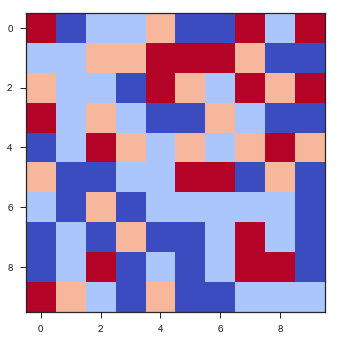

In [83]:
pol1 = policy(Q1,FL1)
plt.imshow(pol1,cmap='coolwarm')
plt.show()

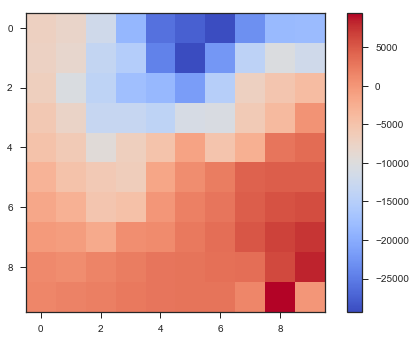

In [84]:
Q1max = MaxQ(Q1)
plt.imshow(Q1max,cmap='coolwarm')
plt.colorbar()
plt.show()

In [85]:
# Homework 4b2
Q2 = np.random.randn(FL2.shape[0],FL2.shape[1],FL2.shape[2])*0.01
alpha = 0.05
gamma = 1.0
epsilon = 0.1
R2_array = []
for i in range(0,10000):
    S_init2 = [0,0]
    R_tot2 = 0.0
    while S_init2 != [FL2.shape[0]-1,FL2.shape[1]-1]:
        a = chooseAction(Q2,S_init2,epsilon)
        q = Q2[S_init2[0], S_init2[1],a]
        S_new = newstate(FL2,S_init2,a)
        a_new = np.argmax(Q2[S_new[0],S_new[1],:])
        q_new = Q2[S_new[0], S_new[1], a_new]
        R = FLCost2[S_new[0], S_new[1]]
        R_tot2 = R_tot2 + R
        Q2[S_init2[0],S_init2[1],a] = q + alpha*(R+gamma*q_new-q)
        S_init2 = S_new
    R2_array.append(R_tot2)
print('finished!')

done!


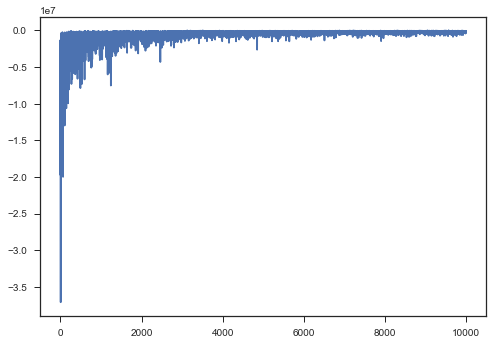

In [86]:
plt.plot(np.arange(len(R2_array)), R2_array)
plt.show()

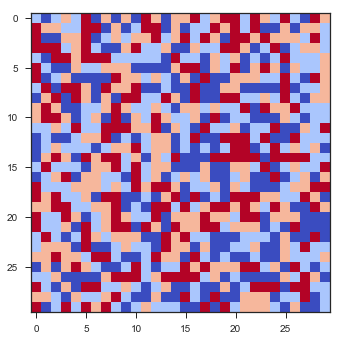

In [87]:
pol2 = policy(Q2,FL2)
plt.imshow(pol2,cmap='coolwarm')
plt.show()

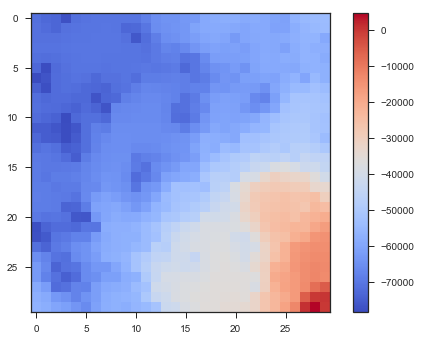

In [88]:
Q2max = MaxQ(Q2)
plt.imshow(Q2max,cmap='coolwarm')
plt.colorbar()
plt.show()

In [ ]:
# Homework 4b3
Q3 = np.random.randn(FL3.shape[0],FL3.shape[1],FL3.shape[2])*0.01
alpha = 0.05
gamma = 1.0
epsilon = 0.1
R3_array = []
count = 0
for i in range(0,15):
    count = count + 1
    S_init3 = [0,0]
    R_tot3 = 0.0
    while S_init3 != [FL3.shape[0]-1,FL3.shape[1]-1]:
        a = chooseAction(Q3,S_init3,epsilon)
        q = Q3[S_init3[0], S_init3[1],a]
        S_new = newstate(FL3,S_init3,a)
        a_new = np.argmax(Q3[S_new[0],S_new[1],:])
        q_new = Q3[S_new[0], S_new[1], a_new]
        R = FLCost3[S_new[0], S_new[1]]
        R_tot3 = R_tot3 + R
        Q3[S_init3[0],S_init3[1],a] = q + alpha*(R+gamma*q_new-q)
        S_init3 = S_new
    R3_array.append(R_tot3)
    print(count)
print('done!')

1
2
3
4
5
6
7
8
9
10
11
12
13


In [ ]:
plt.plot(np.arange(len(R3_array)), R3_array)
plt.show()

In [ ]:
pol3 = policy(Q3,FL3)
plt.imshow(pol3,cmap='coolwarm')
plt.show()

In [ ]:
Q3max = MaxQ(Q3)
plt.imshow(Q3max,cmap='coolwarm')
plt.colorbar()
plt.show()

In [16]:
# import pandas as pd


# class Qlearning:
#     _qmatrix = None
#     _learn_rate = None
#     _discount_factor = None

#     def __init__(self,
#                  possible_states,
#                  possible_actions,
#                  initial_reward,
#                  learning_rate
#                  discount_factor):
#         """
#         Initialise the q learning class with an initial matrix and the parameters for learning.
#         :param possible_states: list of states the agent can be in
#         :param possible_actions: list of actions the agent can perform
#         :param initial_reward: the initial Q-values to be used in the matrix
#         :param learning_rate: the learning rate used for Q-learning
#         :param discount_factor: the discount factor used for Q-learning
#         """
#         # Initialize the matrix with Q-values
#         init_data = [[float(initial_reward) for _ in possible_states]
#                      for _ in possible_actions]
#         self._qmatrix = pd.DataFrame(data=init_data,
#                                      index=possible_actions,
#                                      columns=possible_states)

#         # Save the parameters
#         self._learn_rate = learning_rate
#         self._discount_factor = discount_factor

#     def get_best_action(self, state):
#         """
#         Retrieve the action resulting in the highest Q-value for a given state.
#         :param state: the state for which to determine the best action
#         :return: the best action from the given state
#         """
#         # Return the action (index) with maximum Q-value
#         return self._qmatrix[[state]].idxmax().iloc[0]

#     def update_model(self, state, action, reward, next_state):
#         """
#         Update the Q-values for a given observation.
#         :param state: The state the observation started in
#         :param action: The action taken from that state
#         :param reward: The reward retrieved from taking action from state
#         :param next_state: The resulting next state of taking action from state
#         """
#         # Update q_value for a state-action pair Q(s,a):
#         # Q(s,a) = Q(s,a) + α( r + γmaxa' Q(s',a') - Q(s,a) )
#         q_sa = self._qmatrix.ix[action, state]
#         max_q_sa_next = self._qmatrix.ix[self.get_best_action(next_state), next_state]
#         r = reward
#         alpha = self._learn_rate
#         gamma = self._discount_factor

#         # Do the computation
#         new_q_sa = q_sa + alpha * (r + gamma * max_q_sa_next - q_sa)
#         self._qmatrix.set_value(action, state, new_q_sa)

In [45]:
mat1['FL'][1][1]

array([[ 0.43272698,  0.23022294,  0.18137416,  0.15567593],
       [ 0.28047787,  0.01749684,  0.33280535,  0.36921994],
       [ 0.31122881,  0.15560509,  0.29550816,  0.23765794],
       [ 0.1405268 ,  0.30501008,  0.46565048,  0.08881264]])

In [62]:
states = {1 ,2, 3, 4}
actions = {1, 2, 3, 4}
mat1['FL'][1][1]
q1 = Qlearning(states, actions, mat1['FLCost'][1][2], mat1['FL'][1][2] , 0)

for i in states: 
    q1.update_model(states, actions, mat1['FLCost'][1][2], i)
    q1.get_best_action(i)


/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [63]:
print(q1._qmatrix)

     1    2    3    4
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0


In [73]:
def choose_action(self, state):
    q = [self.getQ(state, a) for a in self.actions]
    maxQ = max(q)
 
    if random.random() < 1:
        best = [i for i in range(len(self.actions)) if q[i] == maxQ]
        i = random.choice(best)
    else:
        i = q.index(maxQ)
 
    action = self.actions[i]
 
    return action

In [ ]:
qmax1 = qmax
plt.imshow(qmax1)
plt.colorbar()
plt.show()